## SME-Focused Loan
**Goal**

Build an SME Loan Approval Decision System that predicts whether a loan should be Approved or Rejected, based on business and financial features.

#### Step 1: Load Libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [3]:
## About the columns:
col_description = pd.read_excel("D:\Project\Data Scientist\SME Loan Approval Decision System\data\MSME Credit Data by 30S-CR_Data Description.xlsx")

In [7]:
col_description.head(20)

,Variable Name,Description
0,Enterprise_id,The primary key uniquely identifying enterpris...
1,Label,1 = default; 0 =non-default.
2,Registered_capital (Ten thousand Yuan),The registered_capital (Ten thousand Yuan) of ...
3,Province,Province
4,Enterprise_type,Enterprise type
5,Establishment_Duration,The establishment duration of the enterprise.
6,The paid_in_capital (Ten thousand Yuan) of the...,Paid_in_capital (Ten thousand Yuan)
7,Sector,The sector of the enterprise.
8,SH_num,The number of shareholders of the enterprise.
9,MS_num,The number of major staffs.


In [8]:
df = pd.read_excel("D:\Project\Data Scientist\SME Loan Approval Decision System\data\MSME Credit Data by 30S-CR.xlsx")

In [9]:
# shape and columns
df.shape

(1707, 89)

In [10]:
df.columns

Index(['Enterprise_id', 'Label', 'Registered_capital (Ten thousand Yuan)',
       'Province', 'Enterprise_type', 'Establishment_Duration (Days)',
       'Paid_in_capital (Ten thousand Yuan)', 'Sector', 'SH_num', 'MS_num',
       'CL_5years+', 'CL_5years', 'CL_4years', 'CL_3years', 'CL_2years',
       'CL_1year', 'Branch_num', 'Certificate_num_5years+',
       'Certificate_num_5years', 'Certificate_num_4years',
       'Certificate_num_3years', 'Certificate_num_2years',
       'Certificate_num_1year', 'Executee_num_5years+', 'Executee_num_5years',
       'Executee_num_4years', 'Executee_num_3years', 'Executee_num_2years',
       'Executee_num_1year', 'Overdue_tax_num_3years',
       'Overdue_tax_num_2years', 'Overdue_tax_num_1year',
       'Administrative_penalty_num_5years',
       'Administrative_penalty_num_4years',
       'Administrative_penalty_num_3years',
       'Administrative_penalty_num_2years', 'Administrative_penalty_num_1year',
       'Trademark_info_num_5years+', 'Trademark

In [11]:
df["Label"].value_counts(normalize=True)


Label
0    0.940246
1    0.059754
Name: proportion, dtype: float64

Data set is highly imbalance

In [14]:
# Lets drop entrprise_id as it NOT predictive
df.drop(columns=["Enterprise_id"], inplace=True)

##### Handling Missing Values

In [15]:
missing = df.isnull().mean().sort_values(ascending= True)
missing.head(15)

Label                              0.0
Work_copyright_info_num_3years     0.0
Work_copyright_info_num_4years     0.0
Work_copyright_info_num_5years     0.0
Work_copyright_info_num_5years+    0.0
Patent_info_num_1year              0.0
Patent_info_num_2years             0.0
Work_copyright_info_num_2years     0.0
Patent_info_num_3years             0.0
Filing_information_num_1years      0.0
Patent_info_num_5years+            0.0
Trademark_info_num_1year           0.0
Trademark_info_num_2years          0.0
Trademark_info_num_3years          0.0
Trademark_info_num_4years          0.0
dtype: float64

In [17]:
num_cols = df.select_dtypes(include = ["int64","float64"]).columns
cat_cols = df.select_dtypes(include = ["object"]).columns

#standard method to fill numerical column is median and categorical columns is mean
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

#### Encoding Categorical columns

In [18]:
from sklearn.preprocessing import OneHotEncoder

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [19]:
#### Train-test Split
from sklearn.model_selection import train_test_split

X = df.drop("Label", axis = 1)
y = df["Label"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, random_state=42, stratify=y)

#### BaseLine Model (Logistic Regression)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [22]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred= model_lr.predict(X_test)
y_prob= model_lr.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       322
           1       0.50      0.10      0.17        20

    accuracy                           0.94       342
   macro avg       0.72      0.55      0.57       342
weighted avg       0.92      0.94      0.92       342

ROC-AUC 0.5468944099378882


C:\Users\Me\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
#### Business Rule Layer
X_test_rules = X_test.copy()

# lets make rules
rule_reject = (
    (X_test_rules["Overdue_tax_num_1year"] > 0) |
    (X_test_rules["Executee_num_1year"] > 0)
)

final_decision = y_pred.copy()
final_decision[rule_reject]= 0

In [24]:
#### Handling class imbalance
model_lr_bal = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

model_lr_bal.fit(X_train, y_train)

y_pred = model_lr_bal.predict(X_test)
y_prob = model_lr_bal.predict_proba(X_test)[:, 1]


C:\Users\Me\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.98      0.71      0.83       322
           1       0.14      0.75      0.24        20

    accuracy                           0.72       342
   macro avg       0.56      0.73      0.53       342
weighted avg       0.93      0.72      0.79       342

ROC-AUC: 0.7669254658385092


In [31]:
#### Testing with random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=10,
    min_samples_leaf=10,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))



              precision    recall  f1-score   support

           0       0.95      0.98      0.96       322
           1       0.38      0.25      0.30        20

    accuracy                           0.93       342
   macro avg       0.67      0.61      0.63       342
weighted avg       0.92      0.93      0.93       342

ROC-AUC: 0.7861801242236025


In [32]:
# Lets set the threshold 
for t in [0.2, 0.3, 0.4, 0.5]:
    preds = (y_prob_rf >= t).astype(int)
    print(f"\nThreshold: {t}")
    print(classification_report(y_test, preds))


Threshold: 0.2
              precision    recall  f1-score   support

           0       1.00      0.35      0.52       322
           1       0.09      1.00      0.16        20

    accuracy                           0.39       342
   macro avg       0.54      0.68      0.34       342
weighted avg       0.95      0.39      0.50       342


Threshold: 0.3
              precision    recall  f1-score   support

           0       0.97      0.62      0.76       322
           1       0.10      0.70      0.18        20

    accuracy                           0.63       342
   macro avg       0.54      0.66      0.47       342
weighted avg       0.92      0.63      0.73       342


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       322
           1       0.23      0.50      0.31        20

    accuracy                           0.87       342
   macro avg       0.60      0.70      0.62       342
weighted avg       0.92   

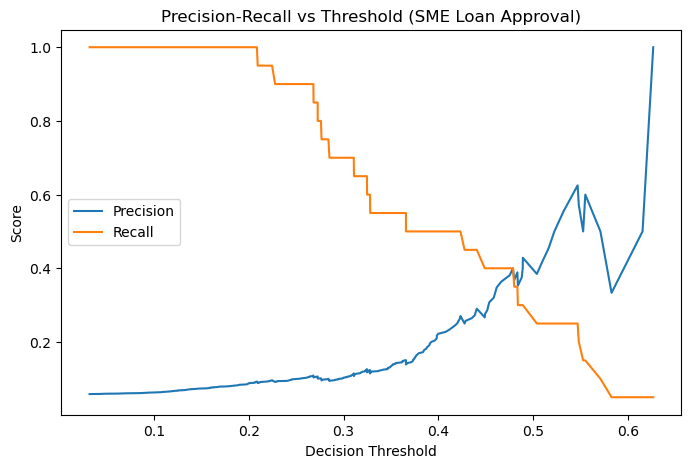

In [33]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,5))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs Threshold (SME Loan Approval)")
plt.show()


In [34]:
# Feature importance
fi = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

fi.head(15)



,feature,importance
0,Registered_capital (Ten thousand Yuan),0.064091
56,t-1 Basic old-age insurance for urban employees,0.052370
1,Establishment_Duration (Days),0.043466
125,Sector_Construction industry,0.041986
65,t-1 Employment injury insurance,0.039595
59,t-1 Unemployment insurance,0.039452
57,t-2 Basic old-age insurance for urban employees,0.033115
62,t-1 Basic medical insurance for employees,0.032862
2,Paid_in_capital (Ten thousand Yuan),0.032633
68,t-1 Birth insurance,0.030394


#### SHAP Explainability

In [37]:
import shap
shap.initjs()

In [39]:
#creating a shap expaliner for Random forest model
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

In [42]:
print("X_train:", X_train.shape, type(X_train))

sv = shap_values
print("type(shap_values):", type(sv))

if isinstance(sv, list):
    print("len(shap_values):", len(sv))
    for k, arr in enumerate(sv):
        print(f"shap_values[{k}].shape:", np.array(arr).shape)
else:
    print("shap_values.shape:", np.array(sv).shape)

X_train: (1365, 138) <class 'pandas.core.frame.DataFrame'>
type(shap_values): <class 'numpy.ndarray'>
shap_values.shape: (1365, 138, 2)


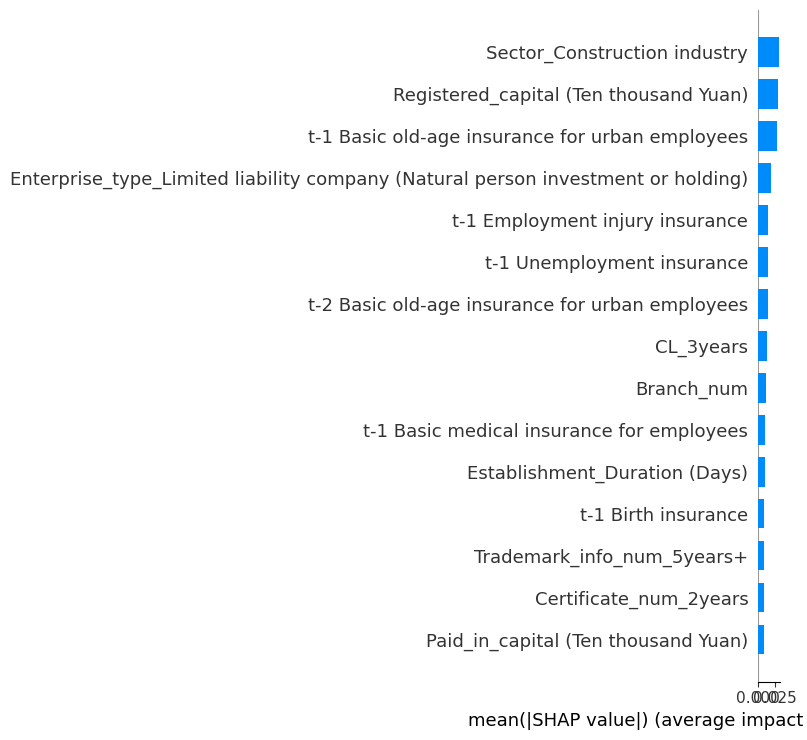

C:\Users\Me\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


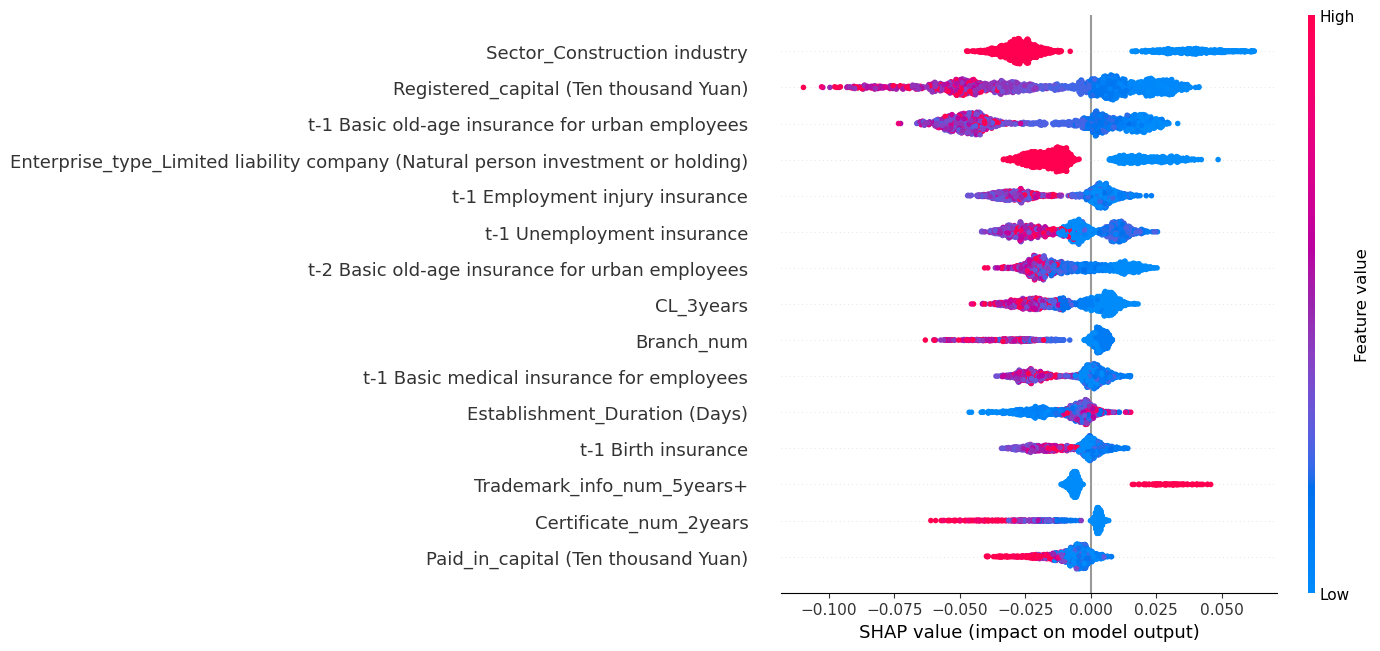

In [46]:
# 1) Make sure X passed to SHAP is EXACTLY what the model sees (same columns/order)
X_shap = X_train.copy()

# 2) Recreate explainer fresh (avoid stale objects)
explainer = shap.TreeExplainer(rf)

# 3) Compute SHAP values
sv = explainer.shap_values(X_shap)

# 4) Convert sv into a 2D matrix matching X_shap.shape (n_samples, n_features)
def to_2d_shap(sv, X, class_idx=1):
    # Case A: list of arrays (binary / multiclass in older SHAP)
    if isinstance(sv, list):
        s = sv[class_idx]
        s = np.array(s)
    else:
        s = np.array(sv)

    # Case B: 3D array (n_samples, n_features, n_classes) in some SHAP versions
    if s.ndim == 3:
        # take class index on last axis
        s = s[:, :, class_idx]

    # Case C: extra bias/offset column (n_features + 1)
    if s.shape[1] == X.shape[1] + 1:
        s = s[:, :-1]

    # Final safety check
    assert s.shape[0] == X.shape[0], (s.shape, X.shape)
    assert s.shape[1] == X.shape[1], (s.shape, X.shape)

    return s

sv2 = to_2d_shap(sv, X_shap, class_idx=1)

# 5) Plot
shap.summary_plot(sv2, X_shap, plot_type="bar", max_display=15)
shap.summary_plot(sv2, X_shap, max_display=15)

In [47]:
print("X_train:", X_train.shape)
print("RF expects:", rf.n_features_in_)


X_train: (1365, 138)
RF expects: 138


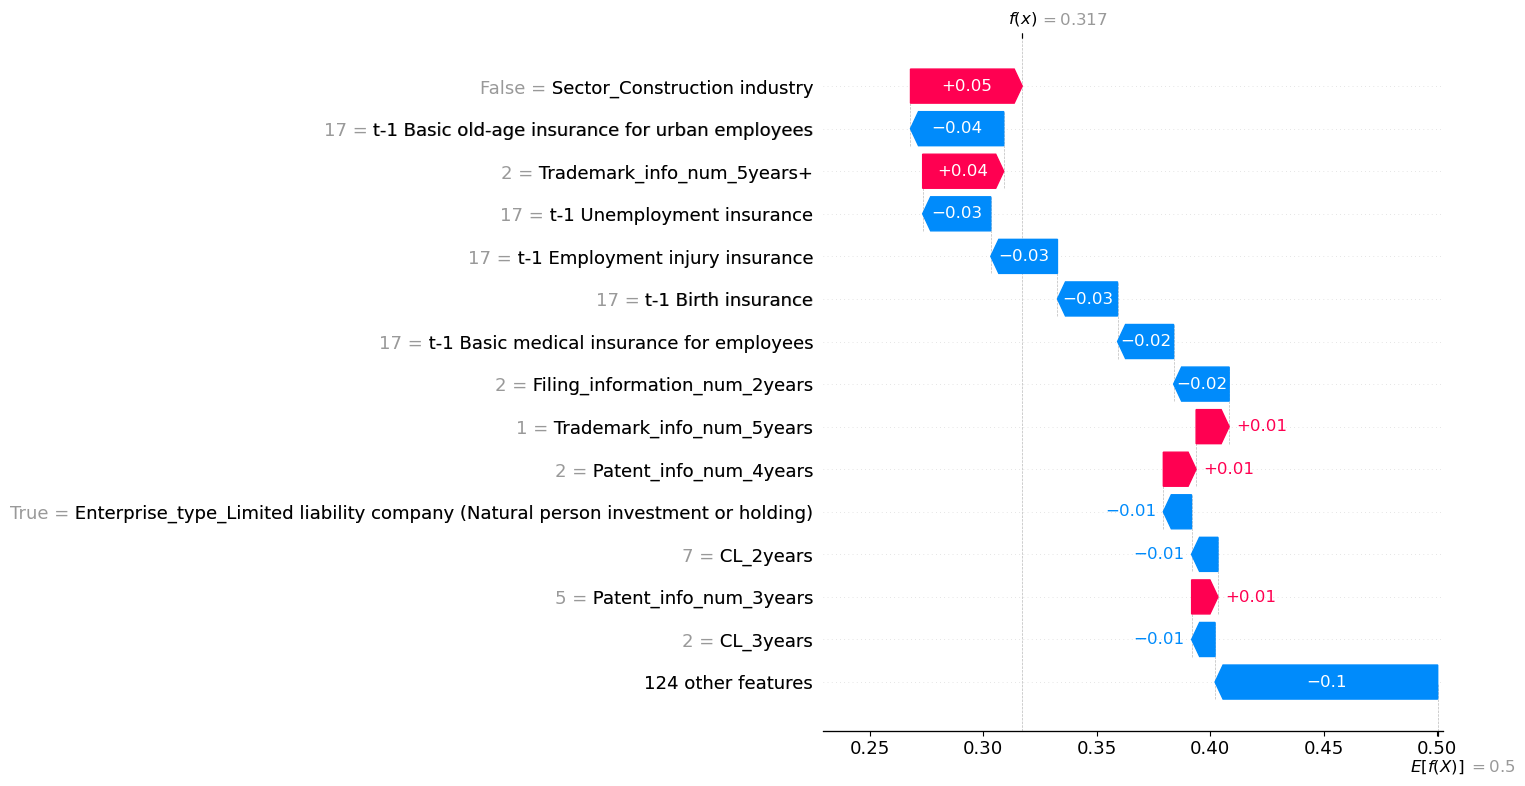

In [48]:
sv_test = explainer(X_test)

# take class 1 if available
try:
    sv_test_pos = sv_test[:, :, 1]
except Exception:
    sv_test_pos = sv_test

i = 0  # choose any row
shap.plots.waterfall(sv_test_pos[i], max_display=15)


In [49]:
import numpy as np
import pandas as pd

proba = rf.predict_proba(X_test)[:, 1]  # approval probability
out = X_test.copy()
out["approval_prob"] = proba

# risk bands (tune later)
out["risk_band"] = pd.cut(
    out["approval_prob"],
    bins=[0, 0.3, 0.6, 1.0],
    labels=["High Risk (Reject)", "Medium Risk (Review)", "Low Risk (Approve)"]
)

out[["approval_prob", "risk_band"]].head(10)


,approval_prob,risk_band
615,0.317218,Medium Risk (Review)
1487,0.117179,High Risk (Reject)
1202,0.101926,High Risk (Reject)
1690,0.555011,Medium Risk (Review)
125,0.246805,High Risk (Reject)
216,0.312541,Medium Risk (Review)
779,0.199025,High Risk (Reject)
655,0.189179,High Risk (Reject)
307,0.241008,High Risk (Reject)
1447,0.320060,Medium Risk (Review)


In [50]:
# get predicted probabilities
# Probabilities for class 1 (Approved / Good)
proba_test = rf.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, proba_test))


ROC-AUC: 0.7861801242236025


In [51]:
profit_tp  =  1000   # profit from a good approved loan
loss_fp    =  8000   # loss from approving a bad loan (default)
cost_fn    =   500   # opportunity cost of rejecting a good SME
benefit_tn =     0   # usually 0

In [53]:
from sklearn.metrics import confusion_matrix

def expected_value(y_true, proba, threshold):
    y_pred = (proba >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    value = tp*profit_tp + fp*(-loss_fp) + fn*(-cost_fn) + tn*benefit_tn
    return value, (tn, fp, fn, tp)

thresholds = np.linspace(0.01, 0.99, 99)
rows = []
for t in thresholds:
    val, (tn, fp, fn, tp) = expected_value(y_test.values, proba_test, t)
    rows.append({"threshold": t, "value": val, "tn": tn, "fp": fp, "fn": fn, "tp": tp})

df_thr = pd.DataFrame(rows).sort_values("value", ascending=False)
best = df_thr.iloc[0]
best


threshold       0.62
value       -8500.00
tn            322.00
fp              0.00
fn             19.00
tp              1.00
Name: 61, dtype: float64

In [54]:
# inscpecting best threshold and its confusion matrix
best_t = float(best["threshold"])
print("Best threshold:", best_t)
print("Expected value:", best["value"])
print("TN FP FN TP:", int(best["tn"]), int(best["fp"]), int(best["fn"]), int(best["tp"]))


Best threshold: 0.62
Expected value: -8500.0
TN FP FN TP: 322 0 19 1


In [55]:
from sklearn.metrics import classification_report

y_pred_best = (proba_test >= best_t).astype(int)
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       322
           1       1.00      0.05      0.10        20

    accuracy                           0.94       342
   macro avg       0.97      0.53      0.53       342
weighted avg       0.95      0.94      0.92       342



#### Policy overrride rules + audit log 

In [57]:
def apply_policy_overrides(X: pd.DataFrame):
    """
    Returns:
      override_flag: boolean array (True if policy overrides ML)
      override_decision: int array (0/1 decision if overridden else -1)
      reasons: list of strings (audit reasons)
    """
    n = len(X)
    override_flag = np.zeros(n, dtype=bool)
    override_decision = np.full(n, -1, dtype=int)
    reasons = [[] for _ in range(n)]

    # Rule 1: Overdue tax in last 1 year -> Reject
    if "Overdue_tax_num_1year" in X.columns:
        mask = X["Overdue_tax_num_1year"].fillna(0) > 0
        for i in np.where(mask)[0]:
            override_flag[i] = True
            override_decision[i] = 0
            reasons[i].append("Policy: Overdue tax in last 1 year")

    # Rule 2: Executee in last 1 year -> Reject
    if "Executee_num_1year" in X.columns:
        mask = X["Executee_num_1year"].fillna(0) > 0
        for i in np.where(mask)[0]:
            override_flag[i] = True
            override_decision[i] = 0
            reasons[i].append("Policy: Executee record in last 1 year")

    # Rule 3: Legal proceedings last 1 year high -> Reject (tune threshold)
    if "Legal_proceedings_num_1year" in X.columns:
        mask = X["Legal_proceedings_num_1year"].fillna(0) >= 1
        for i in np.where(mask)[0]:
            override_flag[i] = True
            override_decision[i] = 0
            reasons[i].append("Policy: Legal proceedings in last 1 year")

    # Optional Rule 4: Very new business -> Review (we keep decision but tag it)
    if "Establishment_Duration (Days)" in X.columns:
        mask = X["Establishment_Duration (Days)"].fillna(0) < 365
        for i in np.where(mask)[0]:
            reasons[i].append("Flag: New business (<1 year)")

    reasons = ["; ".join(r) if len(r) else "" for r in reasons]
    return override_flag, override_decision, reasons


#### Combining ML decision + policy overrides + risk bands

In [59]:
def decision_engine(X: pd.DataFrame, model, threshold: float):
    proba = model.predict_proba(X)[:, 1]
    ml_decision = (proba >= threshold).astype(int)

    override_flag, override_decision, reasons = apply_policy_overrides(X)

    final = ml_decision.copy()
    final[override_flag] = override_decision[override_flag]

    risk_band = pd.cut(
        proba,
        bins=[0, 0.3, 0.6, 1.0],
        labels=["High Risk (Reject)", "Medium Risk (Review)", "Low Risk (Approve)"]
    )

    out = pd.DataFrame({
        "approval_prob": proba,
        "ml_decision": ml_decision,
        "policy_overridden": override_flag,
        "final_decision": final,
        "risk_band": risk_band.astype(str),
        "audit_reason": reasons
    }, index=X.index)

    return out


In [60]:
engine_out = decision_engine(X_test, rf, best_t)
engine_out.head(10)


,approval_prob,ml_decision,policy_overridden,final_decision,risk_band,audit_reason
615,0.317218,0,True,0,Medium Risk (Review),Policy: Executee record in last 1 year; Policy...
1487,0.117179,0,False,0,High Risk (Reject),
1202,0.101926,0,False,0,High Risk (Reject),
1690,0.555011,0,False,0,Medium Risk (Review),
125,0.246805,0,False,0,High Risk (Reject),
216,0.312541,0,False,0,Medium Risk (Review),
779,0.199025,0,True,0,High Risk (Reject),Policy: Legal proceedings in last 1 year
655,0.189179,0,False,0,High Risk (Reject),
307,0.241008,0,False,0,High Risk (Reject),
1447,0.320060,0,False,0,Medium Risk (Review),


In [61]:
print("ML-only @ best threshold:")
print(classification_report(y_test, (proba_test >= best_t).astype(int)))

print("\nHybrid (ML + Policy Overrides):")
print(classification_report(y_test, engine_out["final_decision"].values))


ML-only @ best threshold:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       322
           1       1.00      0.05      0.10        20

    accuracy                           0.94       342
   macro avg       0.97      0.53      0.53       342
weighted avg       0.95      0.94      0.92       342


Hybrid (ML + Policy Overrides):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       322
           1       1.00      0.05      0.10        20

    accuracy                           0.94       342
   macro avg       0.97      0.53      0.53       342
weighted avg       0.95      0.94      0.92       342



In [62]:
import joblib

joblib.dump(rf, "rf_loan_model.joblib")
joblib.dump(list(X_train.columns), "train_columns.joblib")
joblib.dump(best_t, "best_threshold.joblib")


['best_threshold.joblib']